In [1]:
import pandas as pd

In [2]:
dataset = pd.read_excel("Comment Spam.xls")
dataset = dataset.drop(columns="No")
dataset.sample(10)

,Comment,Class
1047,Check out my covers I have a video coming out ...,1
464,"I love this song, it´s for empowering every wo...",0
1149,"She kinda let herself go, huh?﻿",0
1142,Please help me go here http://www.gofundme.com...,1
366,I guss this song is one of my worst fears in l...,0
73,Northland Paranormal Society is now on YouTube...,1
628,Check out this playlist on YouTube:﻿,1
925,I learned the shuffle because of them﻿,0
1282,i love you katy perry because you will sing ni...,0
43,Shakira,0


# Spam Comment Classification
Make a classifier to decide a comments whether it’s spam or not. You can use file "Comment Spam.xls" as Data Training. In the field Class, 0 means not spam and 1 means spam.

In [3]:
dataset["Class"].unique()

array([0, 1], dtype=int64)

In [4]:
dataset["Class"].value_counts()

1    669
0    631
Name: Class, dtype: int64

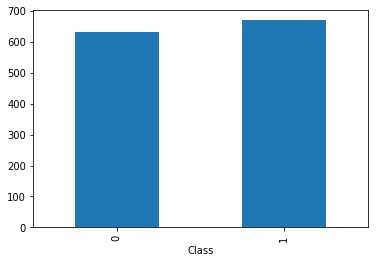

In [30]:
dataset.groupby('Class').Class.count().plot.bar(ylim=0)
plt.show()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
Comment    1300 non-null object
Class      1300 non-null int64
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


# PreProcessing

In [33]:
import os
import nltk
import nltk.corpus
import re
import warnings
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from bs4 import BeautifulSoup
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer

def deprecation(message):
    warnings.warn(message, DeprecationWarning, stacklevel=2)

In [7]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
stopword_user = set(stopwords.words("english"))

In [8]:
def proses_teks(teks):
    soup = BeautifulSoup(teks,'lxml')
    souped = soup.get_text()
    try:
        teks = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        teks = souped
    teks_bersih= re.sub("[^a-zA-Z0-99]", " ",(re.sub(www_pat, '', re.sub(combined_pat, '', teks)).lower()))
    teks_bersih= ' '.join([word for word in teks_bersih.split() if word not in stopword_user])    
    return (" ".join([x for x in tok.tokenize(teks_bersih) if len(x) > 1])).strip()

In [11]:
x=[]
for teks in dataset["Comment"]:
    x.append(proses_teks(teks))

clean_text=pd.DataFrame({'clean_text':x})
data=pd.concat([dataset,clean_text],axis=1)

In [12]:
data.iloc[:,[0,2,1]].sample(10)

,Comment,clean_text,Class
699,You are the music hero😍😎﻿,music hero,0
1091,Whose who are watching this in 2015. LIKE!﻿,whose watching 2015 like,0
1123,Check out this video on YouTube:﻿,check video youtube,1
182,check out you tube keithlinscotts one word kei...,check tube keithlinscotts one word keithlinsco...,1
745,This is my favorite song ever love this Party ...,favorite song ever love party rock everybody,0
1295,Awsome<br />﻿,awsome,0
545,2015!! LLIKEE!!﻿,2015 llikee,0
270,eminem new song check out my videos,eminem new song check videos,1
652,i like this song because of all the animals an...,like song animals like song,0
993,Just coming to check if people are still viewi...,coming check people still viewing video appare...,0


In [15]:
data["spamORno"] = data["Class"]
data.loc[dataset["Class"] == 0,"spamORno"] = "notspam"
data.loc[dataset["Class"] == 1,"spamORno"] = "spam"
data.iloc[:,[0,2,3]].sample(10)

,Comment,clean_text,spamORno
169,Hi. Check out and share our songs.,hi check share songs,spam
417,1000000000 views.﻿,1000000000 views,notspam
340,The best song ever!﻿,best song ever,notspam
151,I love this!!!!! This is one of my fave songs ...,love one fave songs subscribed,spam
838,Im just to check how much views it has﻿,im check much views,notspam
247,Check out my channel to see Rihanna short mix ...,check channel see rihanna short mix,spam
1000,She's awesome XD﻿,awesome xd,notspam
907,"WE GO FOR 1,000,000,000 FOR EMINEM﻿",go 000 000 000 eminem,notspam
693,Almost to a billion :)﻿,almost billion,notspam
750,this is increidebl﻿,increidebl,notspam


# Simple Visualiation sebelum dibersihkan

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [22]:
spam =' '.join([text for text in data["Comment"][data["spamORno"] == "spam"]])
notspam =' '.join([text for text in data["Comment"][data["spamORno"] == "notspam"]])

Text(0.5, 1.0, 'Most frequent word in spam comment')

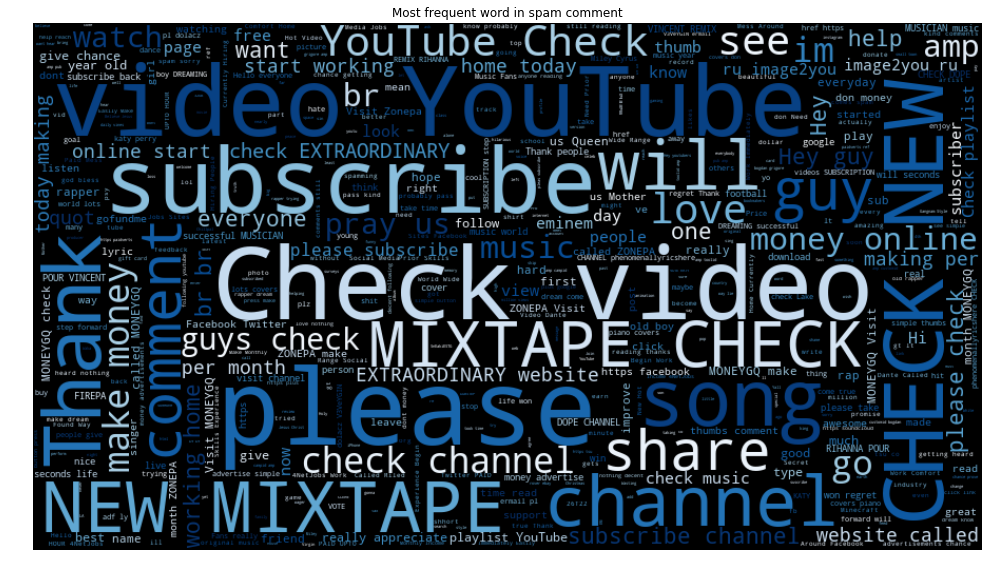

In [23]:
wc_spam = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(spam)

plt.figure(figsize=(17,14))
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis("off")
plt.title("Most frequent word in spam comment")

Text(0.5, 1.0, 'Most frequent word in not spam comment')

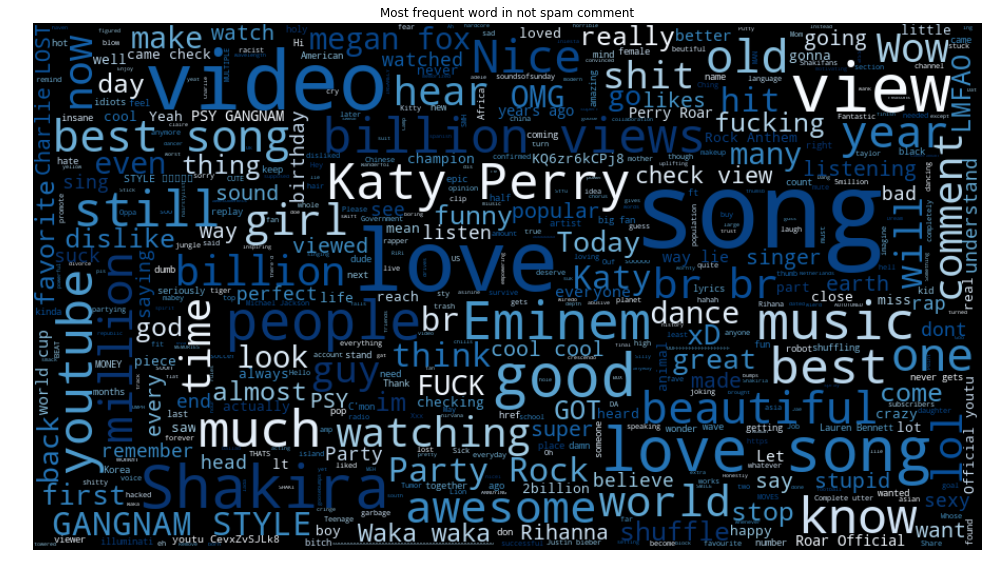

In [20]:
wc_notspam = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(notspam)

plt.figure(figsize=(17,14))
plt.imshow(wc_notspam, interpolation='bilinear')
plt.axis("off")
plt.title("Most frequent word in not spam comment")

# Simple Visualiation setelah dibersihkan

In [25]:
spam2 =' '.join([text for text in data["clean_text"][data["spamORno"] == "spam"]])
notspam2 =' '.join([text for text in data["clean_text"][data["spamORno"] == "notspam"]])

Text(0.5, 1.0, 'Most frequent word in spam comment')

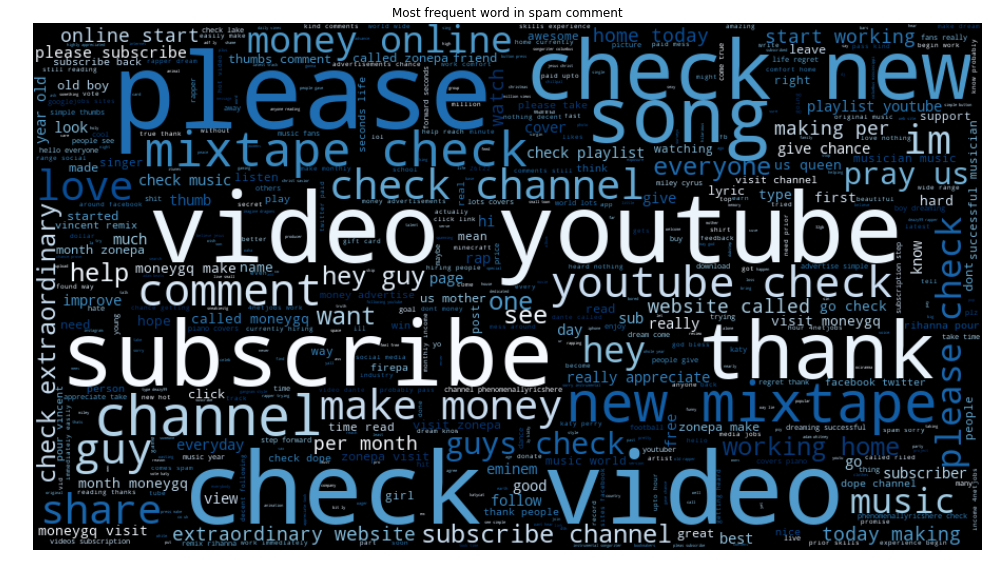

In [26]:
wc_spam2 = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(spam2)

plt.figure(figsize=(17,14))
plt.imshow(wc_spam2, interpolation='bilinear')
plt.axis("off")
plt.title("Most frequent word in spam comment")

Text(0.5, 1.0, 'Most frequent word in not spam comment')

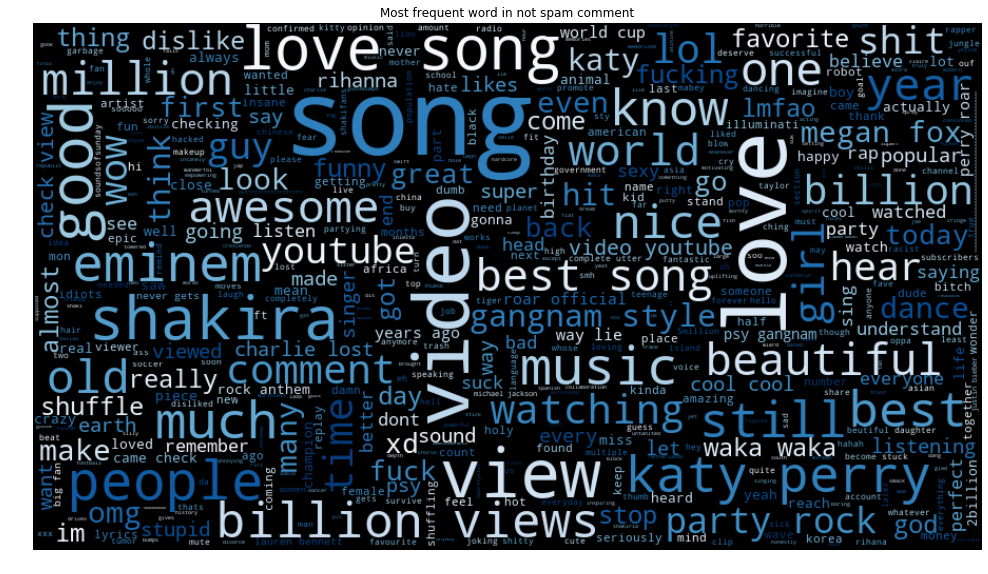

In [27]:
wc_notspam2 = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(notspam2)

plt.figure(figsize=(17,14))
plt.imshow(wc_notspam2, interpolation='bilinear')
plt.axis("off")
plt.title("Most frequent word in not spam comment")

# Pre Processing pembanding dengan stemmer

In [31]:
data.head()

,Comment,Class,clean_text,spamORno
0,this song is racist,0,song racist,notspam
1,and how many subscribers compared to her over ...,1,many subscribers compared million,spam
2,HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...,1,hi check awesome covers say think,spam
3,well done shakira,0,well done shakira,notspam
4,:D subscribe to me for daily vines,1,subscribe daily vines,spam


In [34]:
stemmer = PorterStemmer()
words = stopwords.words("english")
data['clean_text2'] = data['Comment'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [41]:
data.iloc[:,[0,2,4,1]].sample(10)

,Comment,clean_text,clean_text2,Class
628,Check out this playlist on YouTube:﻿,check playlist youtube,check playlist youtub,1
994,charlieee :DDDD (Those who saw Lost only will ...,charlieee dddd saw lost understand,charliee dddd those saw lost understand,0
465,What nicei⛺♥♥♥♥﻿,nicei,what nicei,0
384,https://www.facebook.com/profile.php?id=100007...,,http www facebook com profil php id,1
356,one of the BEST SONGS in music history﻿,one best songs music history,one best song music histori,0
414,This is getting old.........﻿,getting old,thi get old,0
32,Wanna Laugh??? Please SUBSCRIBE to our channel!!!,wanna laugh please subscribe channel,wanna laugh pleas subscrib channel,1
283,You guys should check out this EXTRAORDINARY w...,guys check extraordinary website called moneyg...,you guy check extraordinari websit call moneyg...,1
388,Thank you. Please give your email. ﻿,thank please give email,thank pleas give email,1
723,People who believe in Illuminati are stupid th...,people believe illuminati stupid people believ...,peopl believ illuminati stupid peopl believ ma...,0


# Create Train Test for all dataset using clean_text

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
X=data.clean_text
y=data.Class

In [43]:
(trainX,testX,trainY,testY)=train_test_split(X,y,random_state=250,test_size=0.25)

In [44]:
print('Banyak data trainX :',len(trainX))
print('Banyak data trainY :',len(trainY))
print('Banyak data testX  :',len(testX))
print('Banyak data testY  :',len(testY))

Banyak data trainX : 975
Banyak data trainY : 975
Banyak data testX  : 325
Banyak data testY  : 325


# Vectorizer

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.feature_selection import SelectKBest, chi2

In [60]:
cvec=CountVectorizer() #Convert a collection of text documents to a matrix of token counts
tvec=TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2)) #frequency
hvec=HashingVectorizer() #bagofword

In [54]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(data['clean_text']).toarray()
print(final_features.shape)
print("Menggunakan TfIdf menghasilkan 936 fitur")

(1300, 936)
Menggunakan TfIdf menghasilkan 936 fitur


In [55]:
vectorizer = CountVectorizer()
final_features = vectorizer.fit_transform(data['clean_text']).toarray()
print(final_features.shape)
print("Menggunakan CountVectorizer menghasilkan 2828 fitur")

(1300, 2828)
Menggunakan CountVectorizer menghasilkan 2828 fitur


In [56]:
vectorizer = HashingVectorizer()
final_features = vectorizer.fit_transform(data['clean_text']).toarray()
print(final_features.shape)
print("Menggunakan CountVectorizer menghasilkan 1048576 fitur")

(1300, 1048576)
Menggunakan CountVectorizer menghasilkan 1048576 fitur


# Modelling

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [63]:
clf1 = RandomForestClassifier(n_estimators=150)
clf2 = DecisionTreeClassifier(max_depth=10)
clf3 = SVC(C=0.025,gamma="auto",verbose=True)
clf4 = KNeighborsClassifier(3)

In [69]:
model1 = Pipeline([('vectorizer',tvec),('classifier',clf1)])
model2 = Pipeline([('vectorizer',cvec),('classifier',clf1)])

model3 = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model4 = Pipeline([('vectorizer',cvec),('classifier',clf2)])

In [70]:
model1.fit(trainX,trainY)
hasil1=model1.predict(testX)

model2.fit(trainX,trainY)
hasil2=model2.predict(testX)

In [71]:
model3.fit(trainX,trainY)
hasil3=model3.predict(testX)

model4.fit(trainX,trainY)
hasil4=model4.predict(testX)

# Cek Akurasi

In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [76]:
#Sampel classification_report dan confusion_matrix dari TVEC Vectorizer dan Random Forest
print(classification_report(testY,hasil1))
print(confusion_matrix(testY,hasil1))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       154
           1       0.96      0.90      0.93       171

   micro avg       0.93      0.93      0.93       325
   macro avg       0.93      0.93      0.93       325
weighted avg       0.93      0.93      0.93       325

[[148   6]
 [ 17 154]]


In [80]:
RF_CVEC = accuracy_score(hasil1,testY)
RF_TVEC = accuracy_score(hasil2,testY)

DT_CVEC = accuracy_score(hasil3,testY)
DT_TVEC = accuracy_score(hasil3,testY)

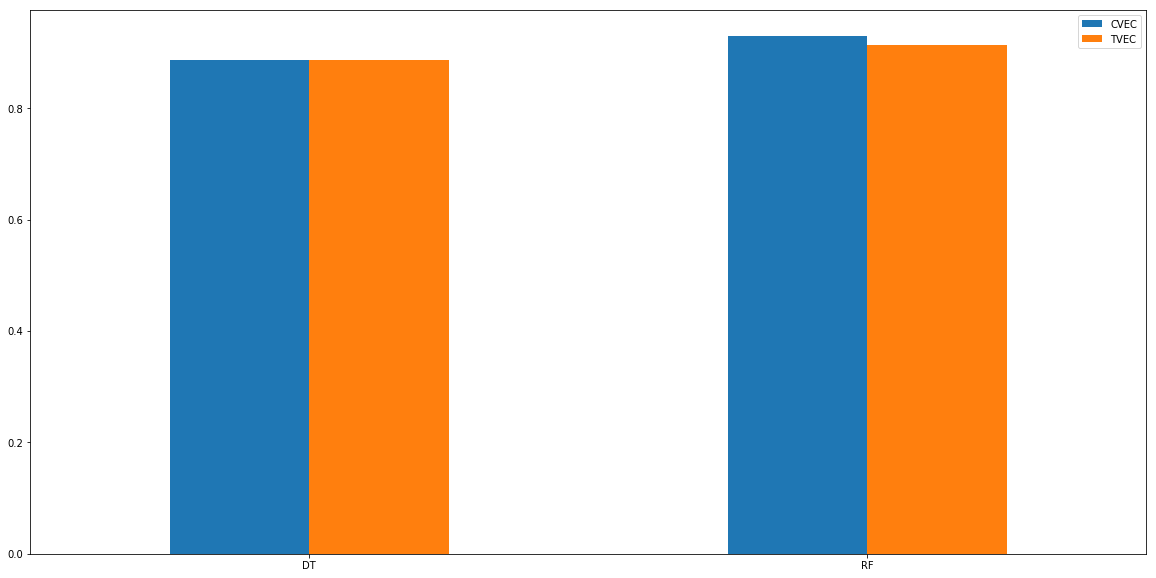

In [85]:
CVEC = [RF_CVEC,DT_CVEC]
TVEC = [RF_TVEC,DT_TVEC]
index = ["RF","DT"]

df = pd.DataFrame({'CVEC': CVEC,'TVEC': TVEC}, index=index)
df.sort_values(by=['CVEC']).plot(kind='bar',stacked=False,figsize=(20,10),rot=0)

In [84]:
print("Akurasi data Spam Comment dengan Klasifikasi Random Forest & TFIDF Vectorizer menghasilkan akurasi sebesar",RF_TVEC*100,"%")
print("Akurasi data Spam Comment dengan Klasifikasi Random Forest & Count Vectorizer menghasilkan akurasi sebesar",RF_CVEC*100,"%")
print("Akurasi data Spam Comment dengan Klasifikasi Decision Tree & TFIDF Vectorizer menghasilkan akurasi sebesar",DT_TVEC*100,"%")
print("Akurasi data Spam Comment dengan Klasifikasi Decision Tree & Count Vectorizer menghasilkan akurasi sebesar",DT_CVEC*100,"%")

Akurasi data Spam Comment dengan Klasifikasi Random Forest & TFIDF Vectorizer menghasilkan akurasi sebesar 91.38461538461539 %
Akurasi data Spam Comment dengan Klasifikasi Random Forest & Count Vectorizer menghasilkan akurasi sebesar 92.92307692307692 %
Akurasi data Spam Comment dengan Klasifikasi Decision Tree & TFIDF Vectorizer menghasilkan akurasi sebesar 88.61538461538461 %
Akurasi data Spam Comment dengan Klasifikasi Decision Tree & Count Vectorizer menghasilkan akurasi sebesar 88.61538461538461 %
